In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                   [9.779], [6.182], [7.59], [2.167], [7.042],
                   [10.791], [5.313], [7.997], [3.1]],
                   dtype = np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                   [3.366], [2.596], [2.53], [1.221], [2.827], 
                   [3.465], [1.65], [2.904], [1.3]],
                   dtype = np.float32)

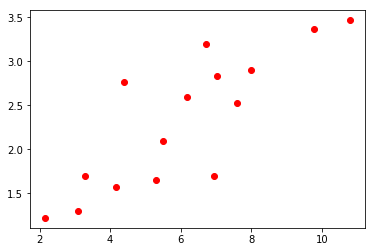

In [3]:
plt.plot(x_train, y_train, 'ro', label = 'Original data')

plt.show()

In [4]:
import torch

In [5]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [6]:
input_size = 1
hidden_size = 100
output_size = 1
learning_rate = 1e-6

In [7]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 100])

In [8]:
w2 = torch.rand(input_size, hidden_size, requires_grad=True)
w2.shape

torch.Size([1, 100])

In [9]:
w2 = torch.rand(hidden_size, output_size, requires_grad=True)
w2.shape

torch.Size([100, 1])

In [11]:
for iter in range(1, 301):
    y_pred = X_train.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 == 0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 3850.36669921875
100 113.99421691894531
150 6.983392715454102
200 3.734529733657837
250 3.6357262134552
300 3.632721424102783


In [12]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[ 0.7678, -0.0019,  0.6649, -0.0087,  0.5797, -0.0043,  0.0180,  0.8047,
          0.2353,  0.8984, -0.0021,  0.1115,  0.4620,  0.5640,  0.7648,  0.5523,
         -0.0226,  0.3816,  0.4910, -0.0087,  0.0350,  0.9073,  0.3583,  0.6053,
          0.3389,  0.4101,  0.5123,  0.0445,  0.6972, -0.0031,  0.7143,  0.2106,
         -0.0079,  0.0852, -0.0017, -0.0019,  0.2256, -0.0059,  0.4841,  0.3275,
          0.4966,  0.6361,  0.4408, -0.0047,  0.4158,  0.8777, -0.0106, -0.0062,
          0.2074,  0.0193, -0.0006,  0.1798,  0.2662,  0.1014,  0.2989,  0.6057,
          0.2816,  0.6172,  0.7628, -0.0052,  0.6161, -0.0077,  0.2046, -0.0076,
          0.4873,  0.0360,  0.3860,  0.6038,  0.1465, -0.0003,  0.7470,  0.3311,
          0.7838, -0.0047,  0.1367, -0.0054,  0.0361, -0.0163,  0.4703, -0.0168,
          0.4924,  0.4712,  0.6025,  0.3752, -0.0017, -0.0004,  0.1233, -0.0070,
          0.4706, -0.0017,  1.1538,  0.4508,  0.7863,  0.3774, -0.0041,  0.2262,
          0.4243,  0.08

In [13]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [14]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).mm(w2)
predicted_in_tensor

tensor([[1.2127],
        [1.6170],
        [2.0212],
        [2.4658],
        [2.5467],
        [1.5317],
        [3.5937],
        [2.2718],
        [2.7892],
        [0.7963],
        [2.5879],
        [3.9656],
        [1.9525],
        [2.9388],
        [1.1392]], grad_fn=<MmBackward>)

In [15]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[ 1.21271288],
       [ 1.61695051],
       [ 2.02118826],
       [ 2.46584988],
       [ 2.54669714],
       [ 1.53169274],
       [ 3.59367275],
       [ 2.27181602],
       [ 2.78924084],
       [ 0.79634821],
       [ 2.58785558],
       [ 3.9655714 ],
       [ 1.95246804],
       [ 2.93880701],
       [ 1.13921523]], dtype=float32)

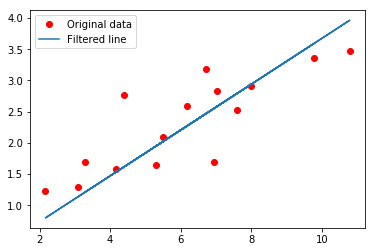

In [16]:
plt.plot(x_train, y_train, 'ro', label = 'Original data')

plt.plot(x_train, predicted, label = 'Filtered line')

plt.legend()

plt.show()